In [1]:
import pandas as pd

df = pd.read_csv('AirPassengers.csv')
print(df.shape)
print(df.head())

(144, 2)
     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


In [47]:
raw_month = list(df['Month'])
passengers = list(df['#Passengers'])

train_x = []
# for i in range(len(raw_month)):
for i in range(100):
    year = int( raw_month[i].split('-')[0] ) - 1949
    month = int( raw_month[i].split('-')[1] )
    year_month = year + month
    # print(f"entry {i+1} --> {year}, {month}    --> {passengers[i]}")
    train_x.append( [year, month] )

print(train_x[:20])

[[0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [0, 10], [0, 11], [0, 12], [1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8]]


In [54]:
import numpy as np

train_y = []
for psg in passengers:
    train_y.append( [psg] )

train_x = np.array(train_x)
train_y = np.array(train_y)

print(train_y[:10])

[[112]
 [118]
 [132]
 [129]
 [121]
 [135]
 [148]
 [148]
 [136]
 [119]]


100

In [49]:
for i in range(10):
    print(f"{train_x[i]} --> {train_y[i]}")

[0 1] --> [112]
[0 2] --> [118]
[0 3] --> [132]
[0 4] --> [129]
[0 5] --> [121]
[0 6] --> [135]
[0 7] --> [148]
[0 8] --> [148]
[0 9] --> [136]
[ 0 10] --> [119]


In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential([
    layers.Dense(64, input_shape=[2], activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(
    loss='mae',
    optimizer='adam',
)

In [55]:
history = model.fit(
    train_x, train_y[:100],
    epochs=150,
    verbose=0
)

model.evaluate(train_x, train_y[:100])

4/4 [==============================] - 0s 2ms/step - loss: 13.1774


13.177423477172852

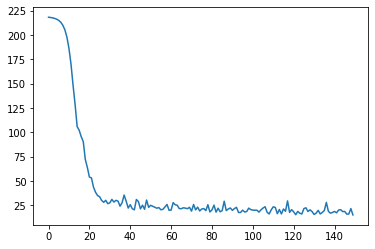

In [56]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.show()

In [58]:
test_x = []
for i in range(len(raw_month)):
    year = int( raw_month[i].split('-')[0] ) - 1949
    month = int( raw_month[i].split('-')[1] )
    year_month = year + month
    # print(f"entry {i+1} --> {year}, {month}    --> {passengers[i]}")
    test_x.append( [year, month] )

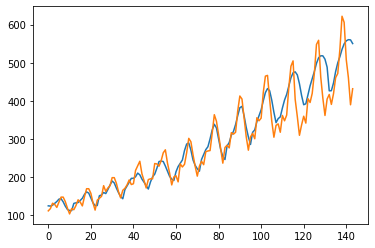

loss: 25.129191451602512


In [59]:
pred = model.predict( test_x )

plt.plot(pred)
plt.plot(train_y)
plt.show()

diff = []
for i in range(len(pred)):
    diff.append( abs(train_y[i][0] - pred[i][0]) )
    # print(f"diff: {str(train_y[i][0] - pred[i][0])[:4]}", end = ' ->  ')
    # print(f"{train_y[i]} --> {pred[i]}")

print( f"loss: {sum(diff)/len(diff)}" )